# Explore here

**Imports**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2, SelectKBest

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

**Importing Data**

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df = pd.read_csv(url, sep=';')
#df.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

In [3]:
#df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Data Exploration and Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [63]:
#Checking for duplicates
df.duplicated().sum()

0

In [6]:
#Dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

In [61]:
df = df.reset_index(drop=True)

In [62]:
#Checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

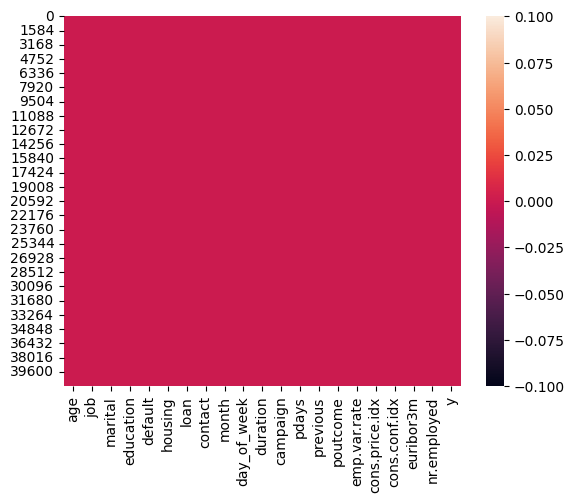

In [70]:
sns.heatmap(df.isnull())

**Descriptive statistics and plot of categorical variables**

In [8]:
cat_variables = df.describe(include=['O'])
cat_variables

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


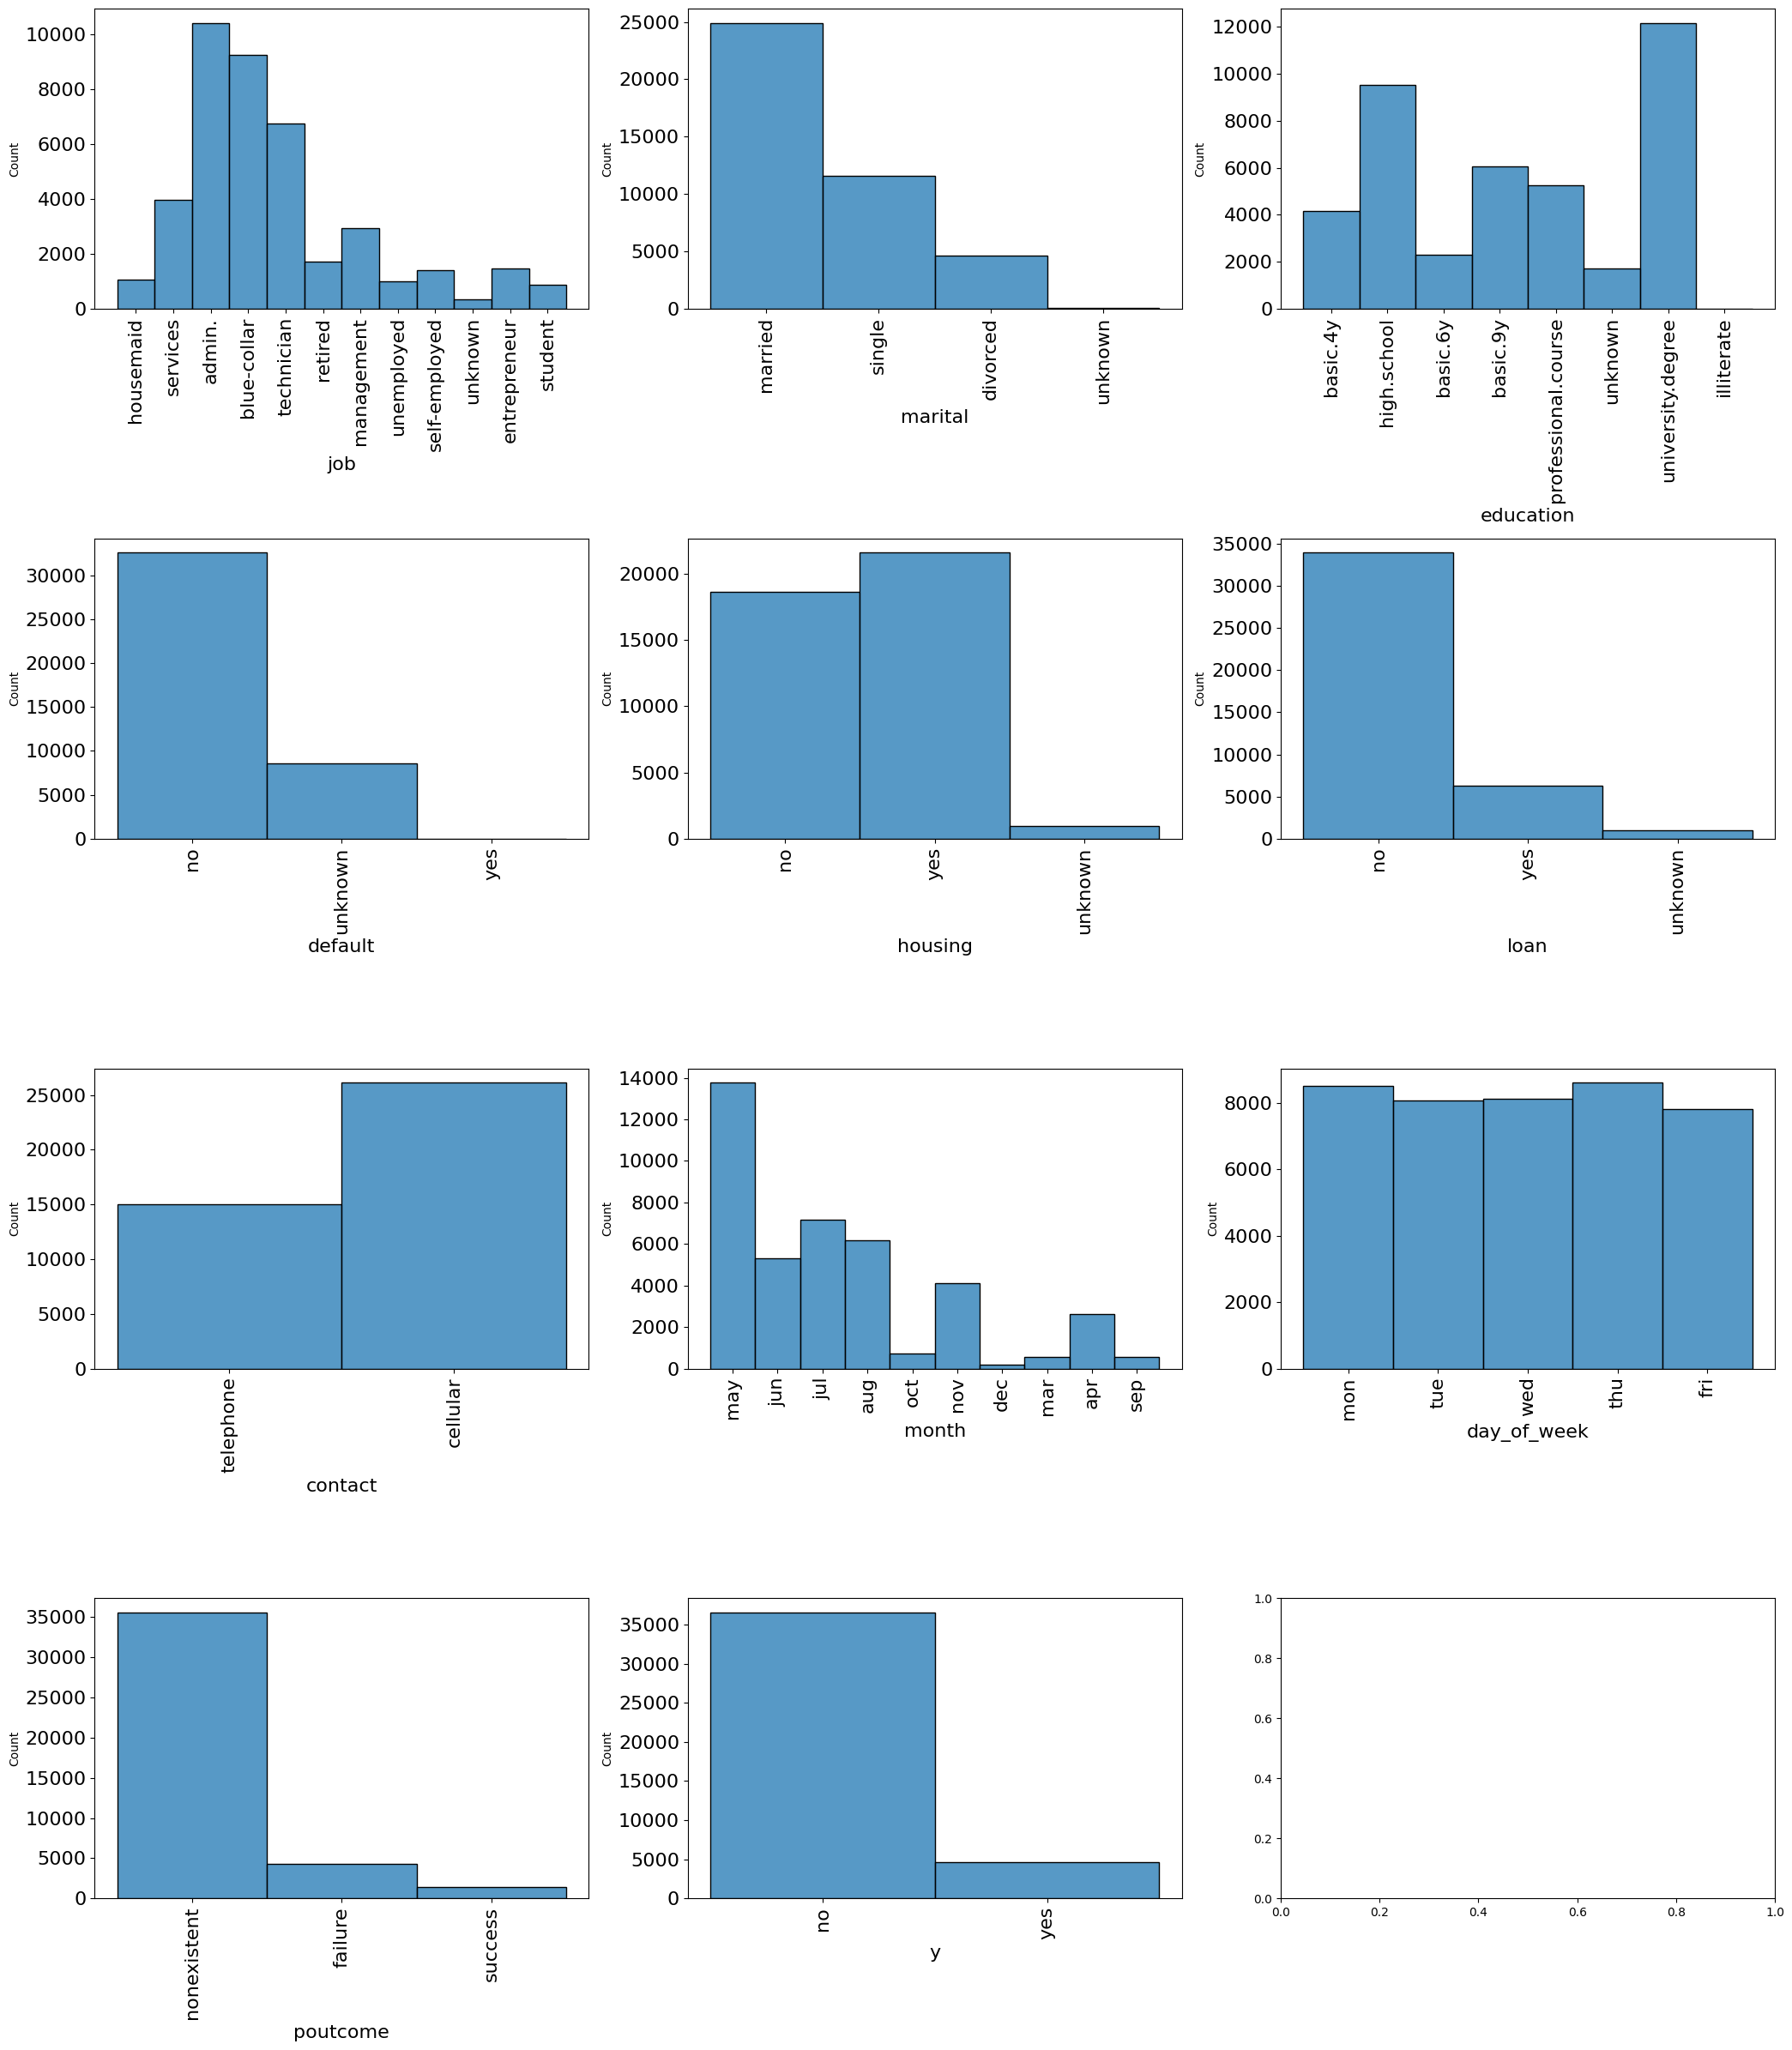

In [14]:
col_list = [i for i in cat_variables.columns]

num_plots = len(col_list) + 1
total_cols = 3
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,figsize=(7*total_cols, 6*total_rows), constrained_layout=True)

index = 0
for col in col_list:

    row = index //total_cols
    pos = index % total_cols
    sns.histplot(ax=axs[row][pos], data=df, x=df[col])
    axs[row][pos].set_xticklabels(axs[row][pos].get_xticklabels(), rotation=90, fontsize=16)
    axs[row][pos].set_yticklabels(axs[row][pos].get_yticklabels(), fontsize=16)
    axs[row][pos].set_xlabel(axs[row][pos].get_xlabel(),fontsize=16)
        
    index += 1
    
plt.tight_layout()
plt.show()

**Descriptive statistics and plot of numerical variables**

In [15]:
num_variables = df.describe()
num_variables

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


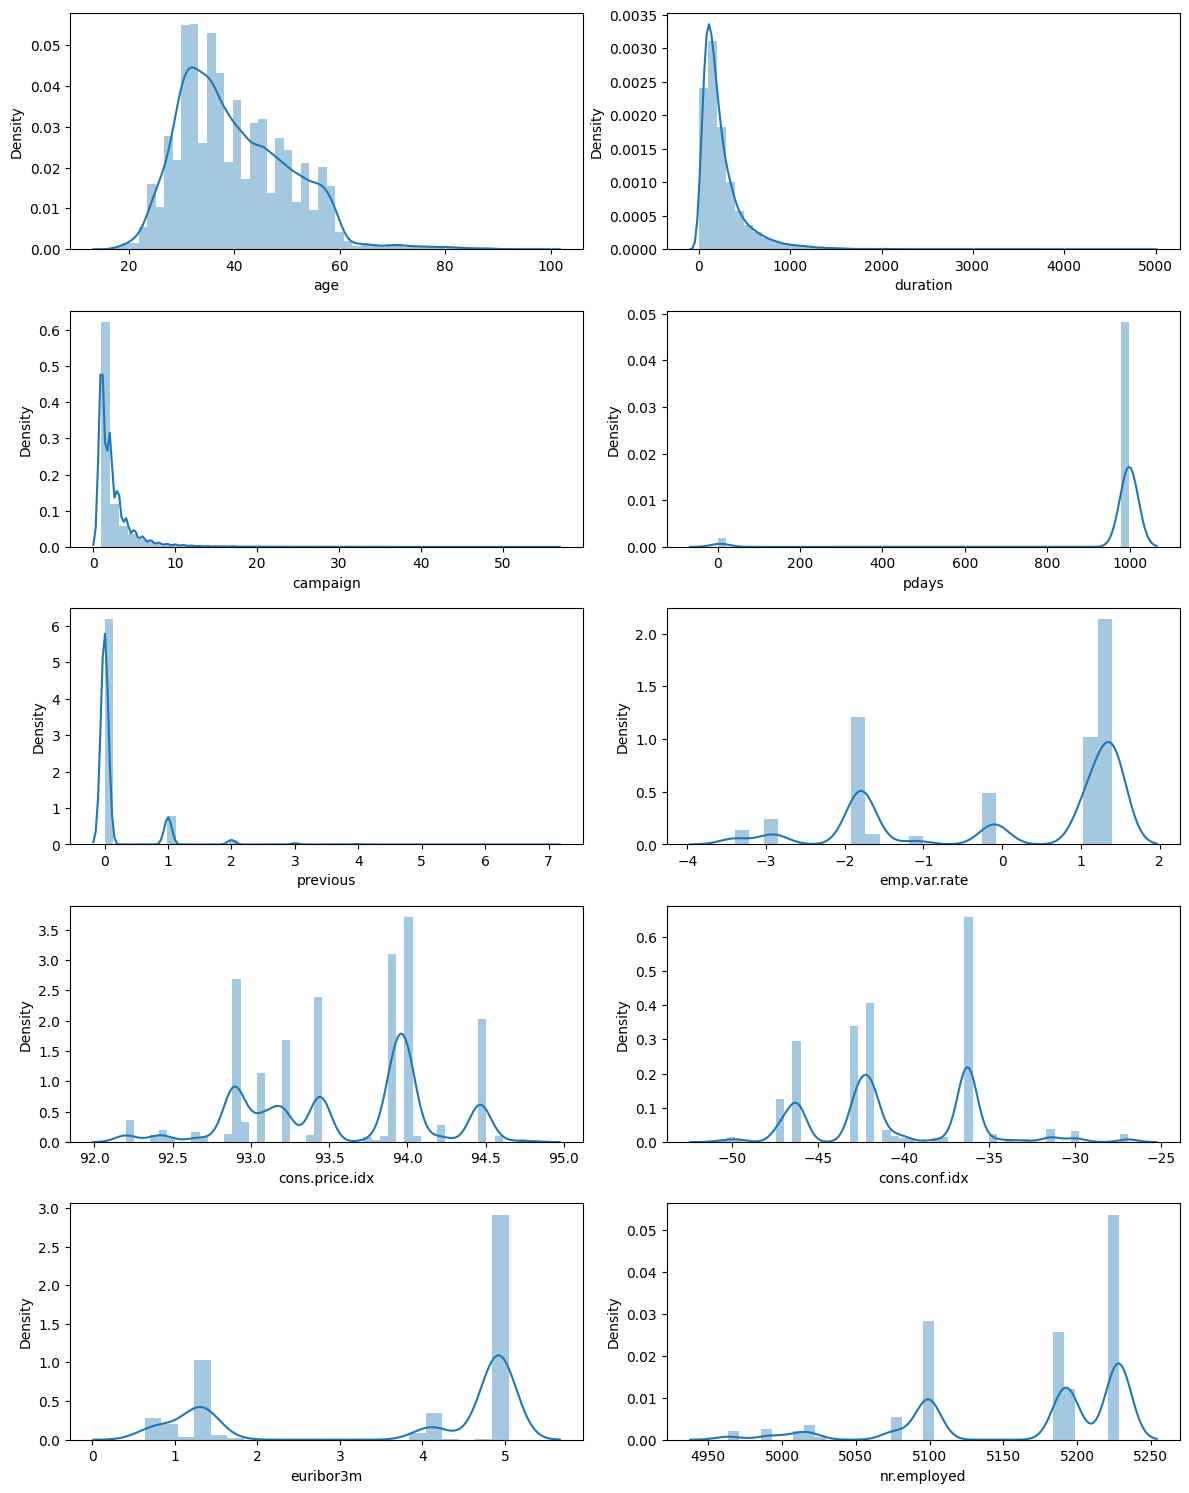

In [19]:
col_n_list = [i for i in num_variables.columns]

num_plots = len(col_n_list)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,figsize=(6*total_cols, 3*total_rows), constrained_layout=True)

index = 0
for col in col_n_list:

    row = index //total_cols
    pos = index % total_cols
    sns.distplot(df[col], rug=False, ax=axs[row][pos])
    
    index += 1
    
plt.tight_layout()
plt.show()


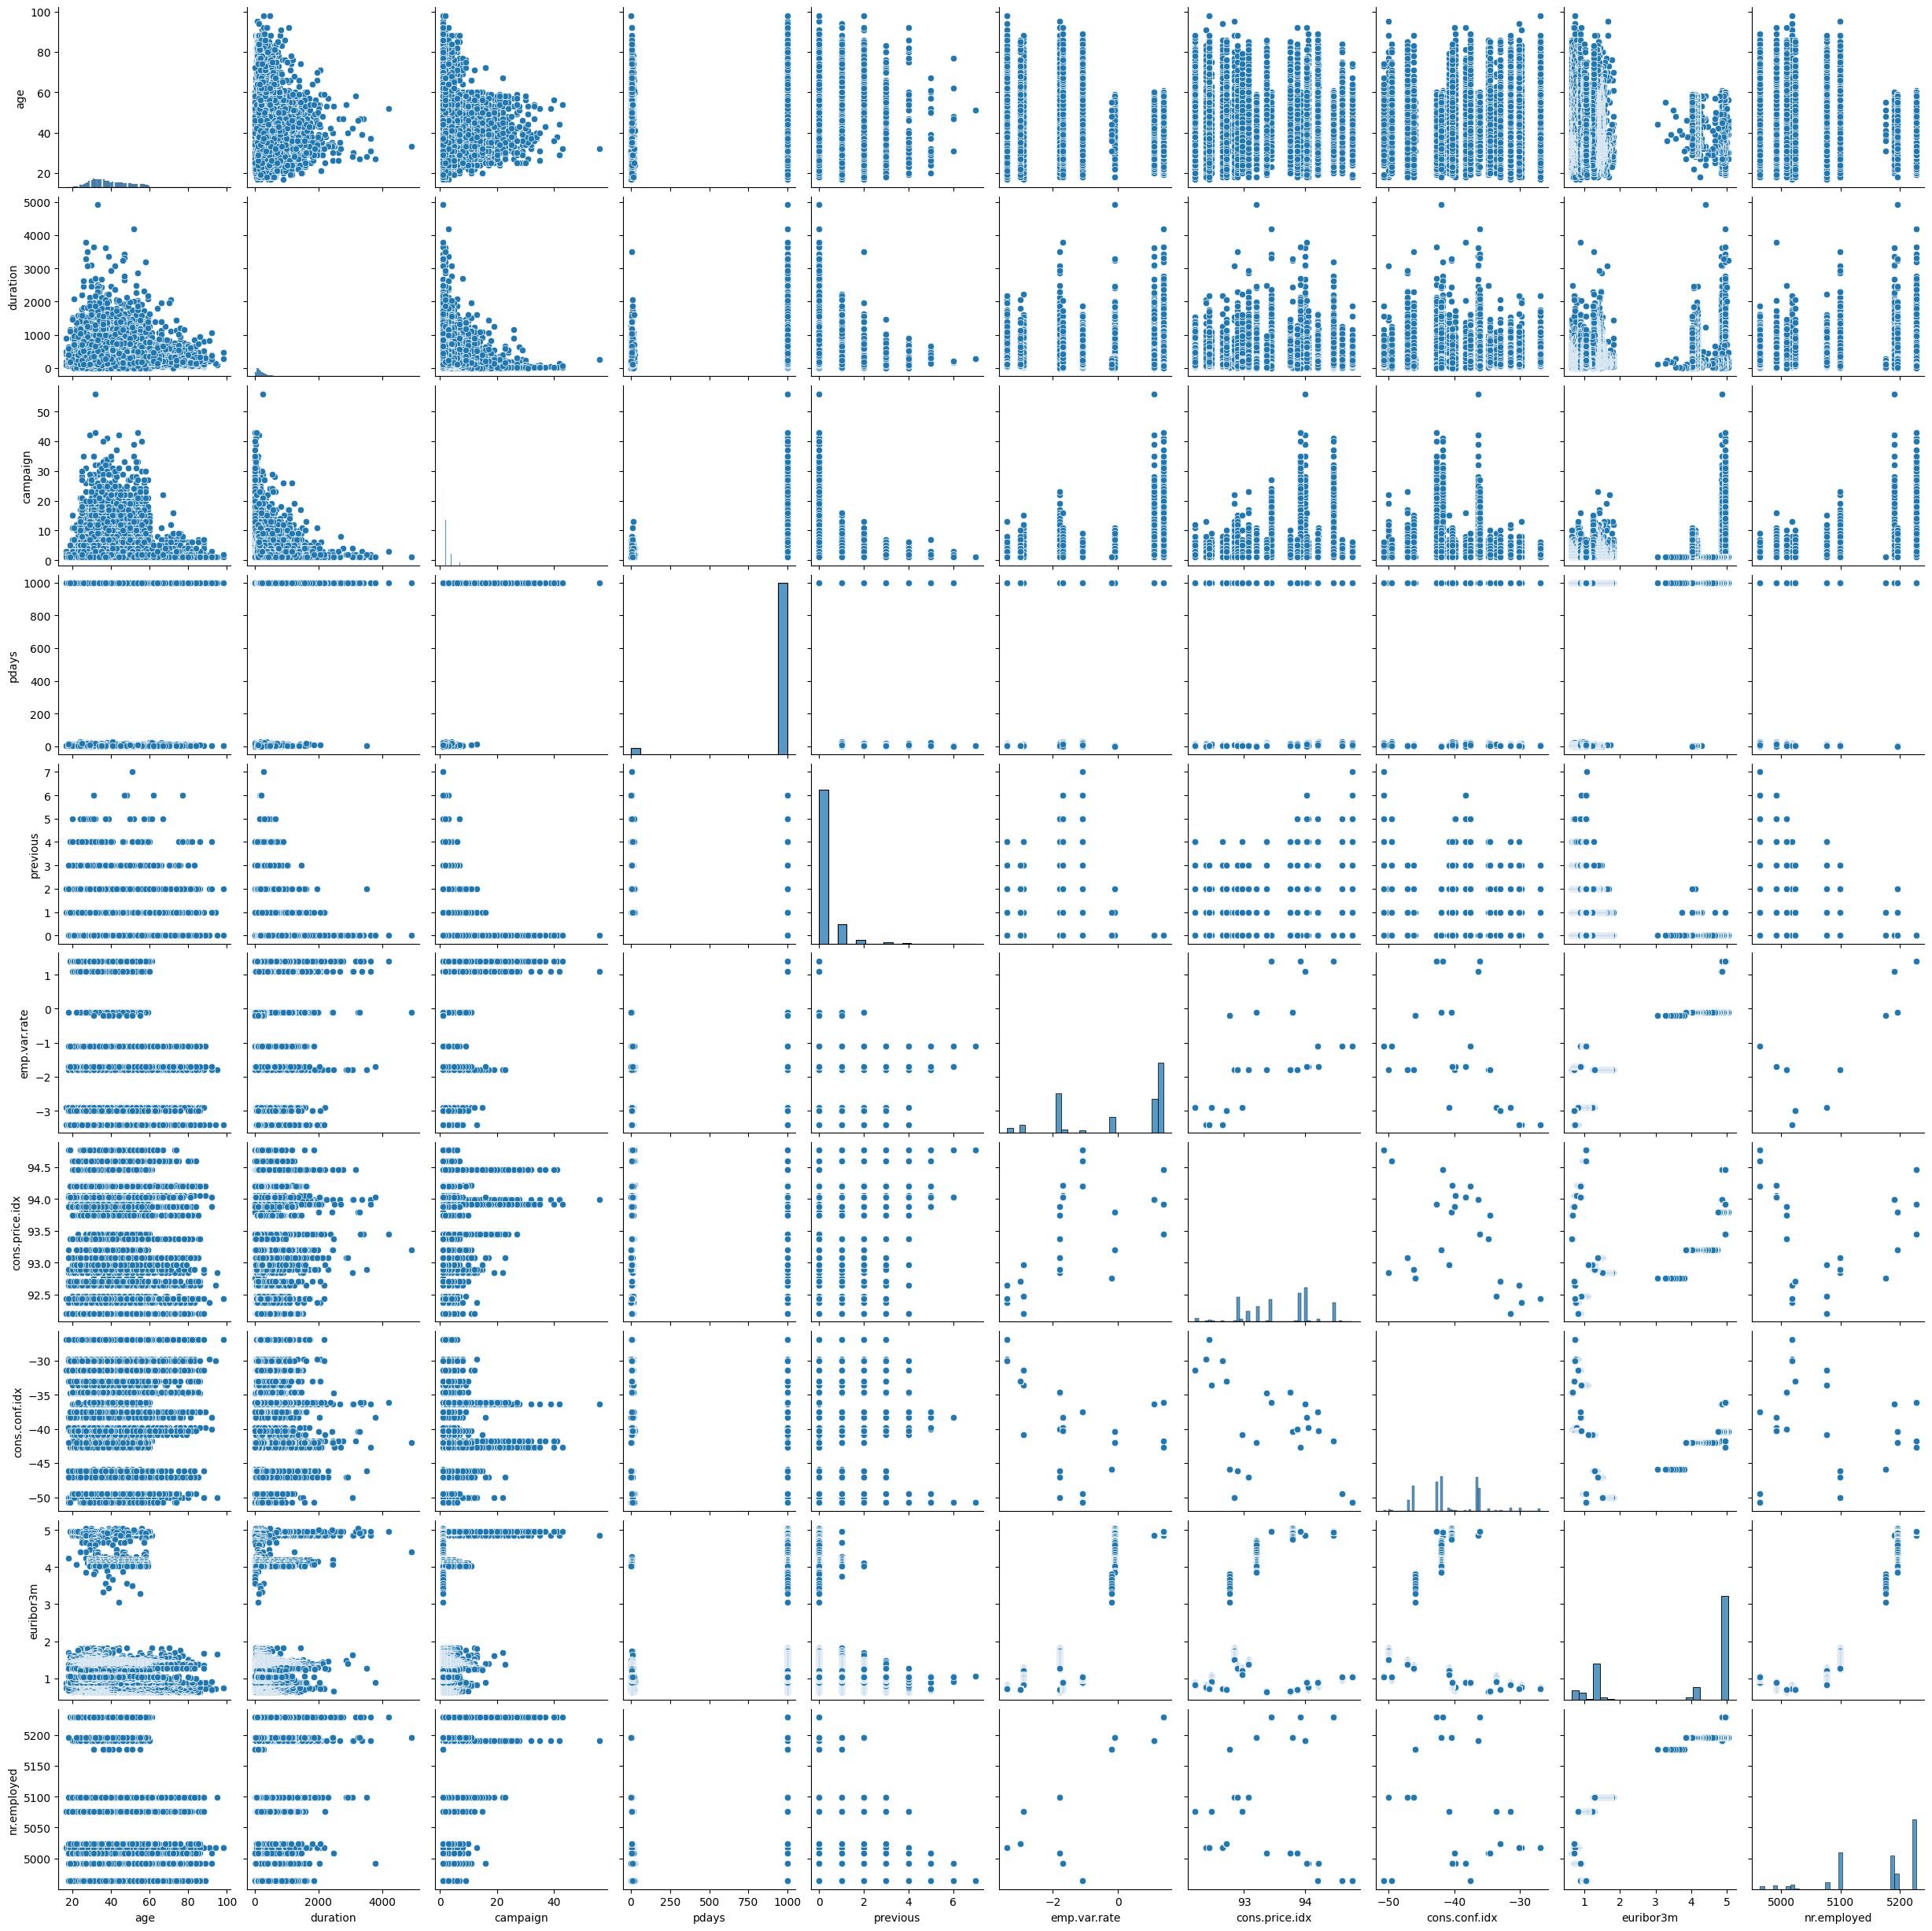

In [12]:
sns.pairplot(df)

**Creating a copy of the dataframe**

In [16]:
df2 = df.copy()

In [17]:
#Factorizing categorical variables
for i in col_list:
    df2[i] = pd.factorize(df2[i])[0]

**Feature Scaling**

In [20]:
#Normalising the numerical variables
scaler = MinMaxScaler()
df2[col_n_list] = scaler.fit_transform(df[col_n_list])

In [21]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,1,0,1,1,0,0,0,0,0,...,0.0,1.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,1,0,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,2,0,2,0,0,0,0,0,0,...,0.0,1.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0


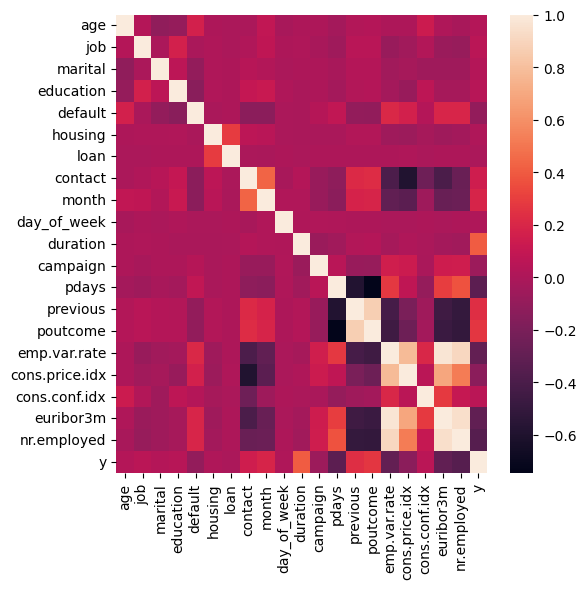

In [66]:
#Correlation matrix
fig = plt.figure(figsize=(6,6))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix)
plt.tight_layout()
plt.show()

**Data split**

In [44]:
X = df2.drop('y', axis=1)
y = df2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print('Train data:\nX:', X_train.shape, 'y:', y_train.shape)
print('Test data:\nX:', X_test.shape, 'y:', y_test.shape)

Train data:
X: (32940, 20) y: (32940,)
Test data:
X: (8236, 20) y: (8236,)


In [46]:
selection_model = SelectKBest(chi2, k=10)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,job,default,contact,month,duration,previous,poutcome,emp.var.rate,euribor3m,nr.employed
0,10.0,0.0,0.0,2.0,0.058154,0.0,0.0,1.000000,0.980503,1.000000
1,2.0,0.0,0.0,1.0,0.036194,0.0,0.0,1.000000,0.958966,1.000000
2,2.0,0.0,1.0,3.0,0.020943,0.0,0.0,1.000000,0.981410,1.000000
3,2.0,0.0,0.0,0.0,0.027450,0.0,0.0,0.937500,0.958059,0.859735
4,3.0,1.0,1.0,0.0,0.084994,0.0,0.0,0.333333,0.148946,0.512287


**Logistic Regression**

In [27]:
model = LogisticRegression()
model.fit(X_train_sel, y_train)

LogisticRegression()

**Model Prediction**

In [47]:
ytrain = model.predict(X_train_sel)

In [48]:
y_pred = model.predict(X_test_sel)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
#Accuracy score
accuracy_train = accuracy_score(y_train, ytrain)
print(f'Accuracy on train data is {accuracy_train:.2f}')
accuracy_predict = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data is {accuracy_predict:.2f}')

Accuracy on train data is 0.91
Accuracy on test data is 0.90


In [59]:
#F1 Score works better for unbalanced data
print(f'F1 Score Train: {f1_score(y_train, ytrain):.2f}')
print(f'F1 Score Test: {f1_score(y_test, y_pred):.2f}')

F1 Score Train: 0.45
F1 Score Test: 0.44


**Confusion Matrix**

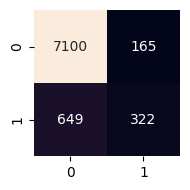

In [60]:
bank_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

- True Positive = 7100 - (model = positive, actual class = positive)
- True negative = 322 - (model = negative,  actual class = negative)
- False positive = 649 - (model = positive, actual class = negative)
- False negative = 165 - (model = negative,  actual class = positive)

**Model Optimization**

***Grid Search***

In [46]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "f1", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'newton-cholesky', 'lbfgs',
                                    'liblinear', 'sag', 'saga']},
             scoring='f1')

In [42]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [43]:
model_grid = LogisticRegression(C=1000, penalty="l1", solver="liblinear")
model_grid.fit(X_train_sel, y_train)
y_pred = model_grid.predict(X_test_sel)

In [74]:
print(f'After model optimization with grid search method the accuracy score of the model is {accuracy_score(y_test, y_pred):.2f} and the F1 score is {f1_score(y_test, y_pred):.2f} which is the same result as before, so the model was not optimized.')

After model optimization with grid search method the accuracy score of the model is 0.90 and the F1 score is 0.44 which is the same result as before, so the model was not optimized.


***Random Search***

In [73]:
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

random_search = RandomizedSearchCV(model, hyperparams, n_iter=100, scoring="f1", cv=5, random_state=42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='f1')

In [75]:
def warn(*args, **kwargs):
    pass
warnings.warn = warn

random_search.fit(X_train_sel, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 29.763514416313132}


In [76]:
model_random_search = LogisticRegression(penalty = "l1", C = 29.763514416313132, solver = "liblinear")
model_random_search.fit(X_train_sel, y_train)
y_pred = model_random_search.predict(X_test_sel)

In [77]:
print(f'After model optimization with random search method the accuracy score of the model is {accuracy_score(y_test, y_pred):.2f} and the F1 score is {f1_score(y_test, y_pred):.2f}')

After model optimization with random search method the accuracy score of the model is 0.90 and the F1 score is 0.46
